# Multi-Layer Perceptron (Artificial Neural Network)

🔹**Introduction**

A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural networks. It is considered one of the simplest and most fundamental deep learning architectures. Unlike a single-layer perceptron, which can only solve linearly separable problems, an MLP can model non-linear decision boundaries using hidden layers and activation functions.

🔹**Architecture**

MLP consists of three types of layers:

* Input Layer – Accepts features from the dataset.
* Hidden Layers – Perform transformations using weights, biases, and activation functions.
* Output Layer – Produces the final prediction (classification or regression).

A neuron in each layer is connected to every neuron in the next layer (fully connected network).

🔹**Key Concepts**

* Activation Functions: Introduce non-linearity (ReLU, Sigmoid, Tanh).
* Backpropagation: Algorithm to update weights by minimizing error using gradients.
* Loss Function: Measures error (e.g., CrossEntropy for classification).
* Optimizer: Updates weights efficiently (SGD, Adam).

🔹**Why MLP?**

* Can learn complex, non-linear patterns.
* Works well for structured/tabular datasets (like Bank Churn).
* Flexible for both classification and regression tasks.

🔹**Applications**

* Bank churn prediction (customer retention).
* Handwritten digit recognition (MNIST).
* Spam email classification.
* Stock price or sales forecasting.

# Bank Churn Prediction using ANN

This notebook documents my journey in building a churn prediction model for a credit card company. Customer churn is a critical business problem, and predicting it accurately can help a company retain its customers.

The main goal of this project is to create a model that can predict whether a customer will leave the company, based on their behavior and demographic data. To achieve this, I will be using a Multilayer Perceptron (MLP), a fundamental type of neural network.

The project covers a complete end-to-end machine learning pipeline:

* Data Preprocessing: Cleaning and transforming raw data to prepare it for the model.

* Model Building: Designing and implementing an MLP from scratch using PyTorch.

* Training and Evaluation: Training the model on a large dataset and evaluating its performance on unseen data.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,RobustScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Importing The dataset
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# basic Exploration

print("Information : \n")
print(df.info())

print("\nMissing Values : \n")
print(df.isnull().sum())

print("\nDuplicate Entries : \n")
print(df.duplicated().sum())

Information : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Missing Values : 

RowNumber          0
CustomerId         0
Surname    

In [4]:
# Exploring categorical features

df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [5]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

# Basic Exploration 

* Total Entries : 1000
* Total Columns : 14
    * Total features : 13
    * Target Column : 1(Exited)
* Missing values : 0
* Duplicate Rows : 0

In [6]:
# Dropping the Useless Features

df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
# This not realted to project. It is to avoid future warning by seaborn

import warnings
warnings.filterwarnings('ignore')

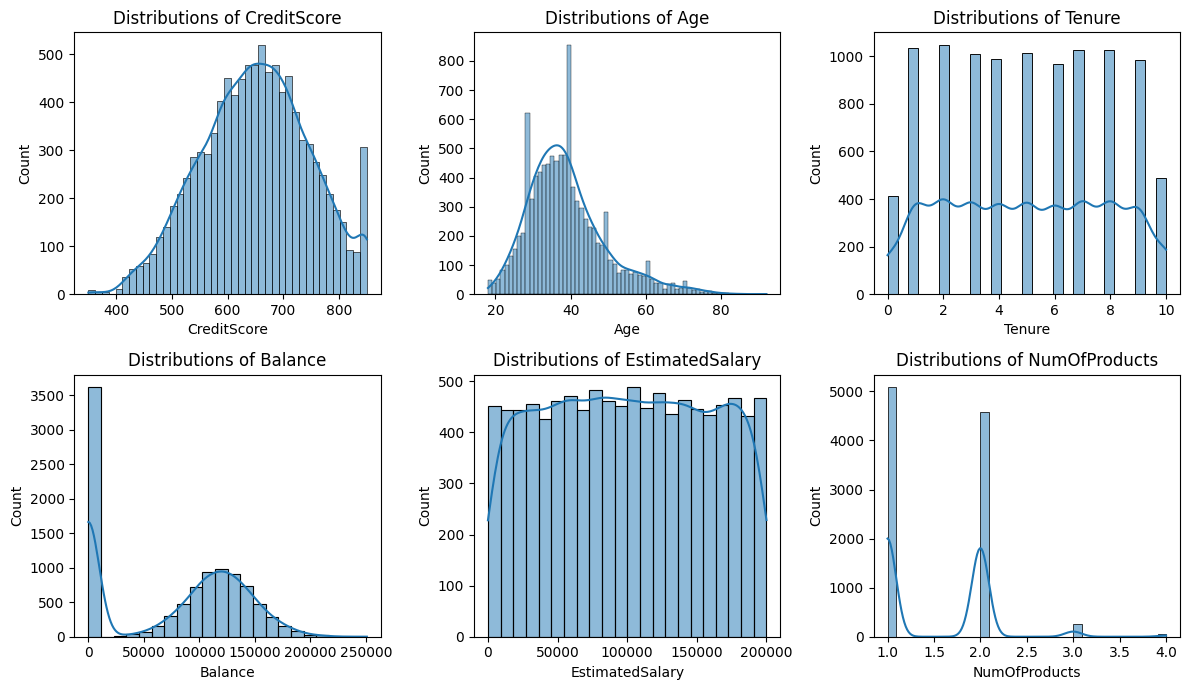

In [9]:
# Distributions for Numeric columns 

num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

n = 0 
plt.figure(figsize=(12,7))
for col in num_cols:
    n = n+1
    plt.subplot(2,3,n)
    sns.histplot(data = df, x = col, kde = True)
    plt.title(f"Distributions of {col}")
plt.tight_layout()
plt.show()

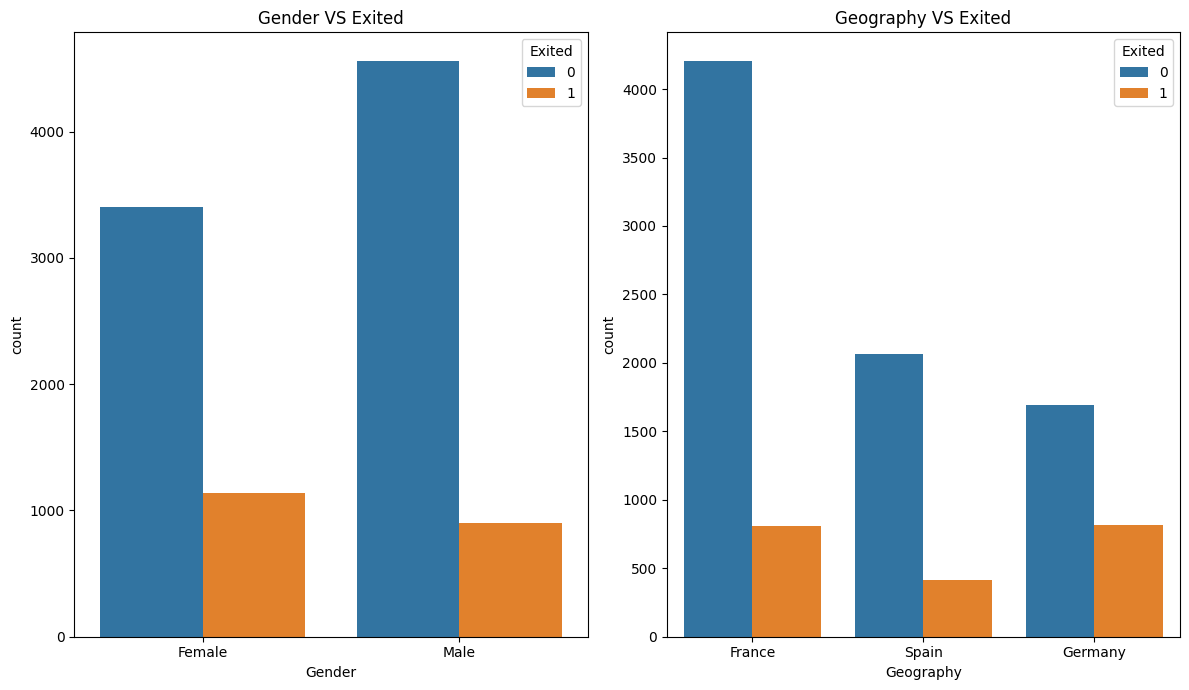

In [10]:
# Gender and geography effect on Exited or churn

plt.figure(figsize=(12,7))

plt.subplot(1,2,1)
plt.title("Gender VS Exited")
sns.countplot(data = df, x = 'Gender', hue = 'Exited')

plt.subplot(1,2,2)
plt.title("Geography VS Exited")
sns.countplot(data = df, x = 'Geography', hue = 'Exited')

plt.tight_layout()
plt.show()

In [11]:
# splitting the data 
x = df.drop('Exited',axis = 1)
y = df['Exited']

In [12]:
# Scaling and encoding the data

transformer = ColumnTransformer(transformers = [
    ('sta_sca',StandardScaler(),['CreditScore','Age']),
    ('min_max',MinMaxScaler(),['Tenure','EstimatedSalary']),
    ('rob_sca',RobustScaler(),['Balance','NumOfProducts']),
    ('one_hot',OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'),['Gender','Geography']),
    ('Passthrough','passthrough',['HasCrCard','IsActiveMember'])
])

transformed_data = transformer.fit_transform(x)

transformed_data_features = transformer.get_feature_names_out()

x_transformed = pd.DataFrame(transformed_data, columns = transformed_data_features)



In [13]:
 x_transformed

,sta_sca__CreditScore,sta_sca__Age,min_max__Tenure,min_max__EstimatedSalary,rob_sca__Balance,rob_sca__NumOfProducts,one_hot__Gender_Female,one_hot__Gender_Male,one_hot__Geography_France,one_hot__Geography_Germany,one_hot__Geography_Spain,Passthrough__HasCrCard,Passthrough__IsActiveMember
0,-0.326221,0.293517,0.2,0.506735,-0.761480,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
1,-0.440036,0.198164,0.1,0.562709,-0.104906,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-1.536794,0.293517,0.8,0.569654,0.489346,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,0.1,0.469120,-0.761480,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.063884,0.388871,0.2,0.395400,0.221806,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,0.5,0.481341,-0.761480,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9996,-1.391939,-0.373958,1.0,0.508490,-0.312031,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
9997,0.604988,-0.278604,0.7,0.210390,-0.761480,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,1.256835,0.293517,0.3,0.464429,-0.173319,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [14]:
# Splitting the data into training and testing data

x_train,x_test,y_train,y_test = train_test_split(x_transformed,y,test_size=0.2,random_state=30,stratify = y,)

In [15]:
# Converting them to numpy arrays
x_train_np = x_train.values
x_test_np = x_test.values
y_train_np = y_train.values
y_test_np = y_test.values

In [16]:
# Converting to tensors because neural networks only accepts tensors

x_train_tensor = torch.tensor(x_train_np, dtype = torch.float32)
x_test_tensor = torch.tensor(x_test_np, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_np, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype = torch.float32)

In [17]:
# Checking for GPU access
device = torch.device('cuda' if torch.cuda.is_available() else 'CPU')
print(f"Using Device : {device}")

Using Device : cuda


In [18]:
# Creating Dataset class

class CustomDataset(Dataset):
    def __init__(self,features,labels):
        self.features = features
        self.labels = labels
    def __len__(self):
        return len(self.features)
    def __getitem__(self,index):
        return self.features[index],self.labels[index]



In [19]:
# Objects for training and testing data

train_dataset = CustomDataset(x_train_tensor,y_train_tensor)
test_dataset = CustomDataset(x_test_tensor,y_test_tensor)

In [20]:
# Objects for DatLoader class

train_loader = DataLoader(train_dataset,batch_size = 64, shuffle = True, pin_memory = True)
test_loader = DataLoader(test_dataset,batch_size = 64, shuffle = False, pin_memory = True)

In [21]:
# Creating Neural Network Architecture

class MyNN(nn.Module):
    def __init__(self,num_features):
        super().__init__()
        self.num_features = num_features
        self.model = nn.Sequential(
            nn.Linear(num_features,16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8,1),
            nn.Sigmoid()
        )
    def forward(self,x):
        return self.model(x)
        

In [22]:
# Epochs and lerning_rate
epochs = 200
learning_rate = 0.3

In [23]:
# Initalizing the model

# Model
model = MyNN(x_train_tensor.shape[1])
model.to(device)

#loss function Initialization
loss_fn = nn.BCELoss()

#Optimization

optim = optim.SGD(model.parameters(), lr = learning_rate)



In [24]:
# Training the data

for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_features,batch_labels in train_loader:
        # Moving to GPU
        batch_features,batch_labels = batch_features.to(device),batch_labels.to(device)

        # Forward Pass
        output = model(batch_features)

        # Loss Calculation
        loss = loss_fn(output,batch_labels.view(-1,1).float())

        # back propogation
        optim.zero_grad()
        loss.backward()

        # Optimization
        optim.step()

        total_epoch_loss = total_epoch_loss + loss.item()

    avg_epoch_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch : {epoch+1}   Loss : {avg_epoch_loss}")

Epoch : 1   Loss : 0.4644594841003418
Epoch : 2   Loss : 0.4249417979717255
Epoch : 3   Loss : 0.4100945361852646
Epoch : 4   Loss : 0.38409878420829774
Epoch : 5   Loss : 0.36093733406066897
Epoch : 6   Loss : 0.35180197191238405
Epoch : 7   Loss : 0.34665022575855253
Epoch : 8   Loss : 0.34491354346275327
Epoch : 9   Loss : 0.34073207664489746
Epoch : 10   Loss : 0.3404534132480621
Epoch : 11   Loss : 0.33847082471847534
Epoch : 12   Loss : 0.3392371345758438
Epoch : 13   Loss : 0.3355067002773285
Epoch : 14   Loss : 0.33703121602535246
Epoch : 15   Loss : 0.33425553631782534
Epoch : 16   Loss : 0.33676974308490754
Epoch : 17   Loss : 0.33565017008781434
Epoch : 18   Loss : 0.3352263970375061
Epoch : 19   Loss : 0.33295363128185274
Epoch : 20   Loss : 0.33360196137428283
Epoch : 21   Loss : 0.332693421125412
Epoch : 22   Loss : 0.33228485798835755
Epoch : 23   Loss : 0.33210799014568326
Epoch : 24   Loss : 0.33174465656280516
Epoch : 25   Loss : 0.3307147444486618
Epoch : 26   Loss :

In [25]:
# Model Evaluation

# Set the model to evaluation mode
model.eval()

# Reset lists before starting the evaluation run
all_preds = []
all_labels = []

# Turn off gradient calculation for evaluation
with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Move data to GPU
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        # Forward pass
        outputs = model(batch_features)

        # Convert probabilities to binary predictions (0 or 1)
        predictions = (outputs > 0.5).float().cpu().numpy()
        
        all_preds.extend(predictions)
        all_labels.extend(batch_labels.cpu().numpy())

# Convert lists to NumPy arrays
# Use .flatten() to ensure a 1D array
all_preds = np.array(all_preds).flatten()
all_labels = np.array(all_labels).flatten()

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds)
recall = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")

Test Accuracy: 0.8640
Test Precision: 0.7437
Test Recall: 0.5061
Test F1-Score: 0.6023


# Summary

The model achieved a test accuracy of ~86%, which initially looks good. However, deeper evaluation metrics revealed that the model struggles with correctly identifying customers who actually churn (Recall ≈ 43%). This gap highlights the impact of class imbalance—where non-churn cases dominate the dataset, leading the model to bias towards predicting customers as “not leaving.”

While accuracy remains high, metrics like Precision, Recall, and F1-score provide better insights. Precision indicates the model is fairly reliable when it predicts churn, but Recall shows it misses many actual churn cases. This is common in real-world business problems where imbalanced datasets cause models to favor the majority class.

👉 Overall, this project strengthened my understanding of MLPs, model evaluation beyond accuracy, and the importance of handling class imbalance in predictive modeling.